In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data

# 데이터셋 다운
(x_train,y_train), (x_test,y_test) = load_data()
print(x_train.shape,x_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


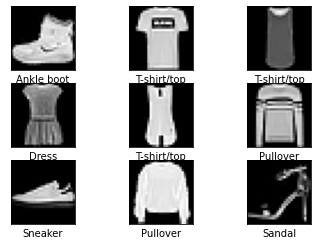

In [ ]:
# 데이터 그리기
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

sample_size = 9
random_idx = np.random.randint(60000,size = sample_size)

plt.figure()
for i, idx in enumerate(random_idx):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap='gray')
  plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
# 전처리 및 검증 데이터 셋
from tensorflow.keras.utils import to_categorical

x_train = x_train /255
x_test = x_test /255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.3,random_state=777)

In [ ]:
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(42000, 28, 28) (18000, 28, 28) (42000, 10) (18000, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

first_model = Sequential()

# 입력 데이터의 형태를 꼭 명시해야 한다.
first_model.add(Flatten(input_shape = (28,28))) # (28, 28) -> (28*28)
first_model.add(Dense(64, activation = 'relu')) # 64개의 출력을 가지는 Dense 층
first_model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense 층
first_model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

In [ ]:
first_model.compile(optimizer='adam', # adam 사용
                    loss = 'categorical_crossentropy',
                    metrics=['acc'])

first_history = first_model.fit(x_train,y_train,
                                epochs=30,
                                batch_size=128,
                                validation_data=(x_val,y_val))

Epoch 1/30
329/329 [==============================] - 3s 5ms/step - loss: 0.6561 - acc: 0.7752 - val_loss: 0.4734 - val_acc: 0.8338
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4401 - acc: 0.8456 - val_loss: 0.4294 - val_acc: 0.8486
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.4021 - acc: 0.8572 - val_loss: 0.3884 - val_acc: 0.8671
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3722 - acc: 0.8647 - val_loss: 0.3739 - val_acc: 0.8658
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3501 - acc: 0.8726 - val_loss: 0.3697 - val_acc: 0.8682
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3341 - acc: 0.8789 - val_loss: 0.3607 - val_acc: 0.8728
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3207 - acc: 0.8834 - val_loss: 0.3470 - val_acc: 0.8776
Epoch 8/30
329/329 [==============================] - 1s 4ms/step - loss: 0.

In [ ]:
second_model = Sequential()

# 입력 데이터의 형태를 꼭 명시해야 한다.
second_model.add(Flatten(input_shape = (28,28))) # (28, 28) -> (28*28)
second_model.add(Dense(128, activation = 'relu')) # 128개의 출력을 가지는 Dense 층
second_model.add(Dense(64, activation = 'relu')) # 64개의 출력을 가지는 Dense 층
second_model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense 층
second_model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

second_model.compile(optimizer='adam',
                     loss = 'categorical_crossentropy',
                     metrics=['acc'])

second_history = second_model.fit(x_train,y_train,
                                epochs=30,
                                batch_size=128,
                                validation_data=(x_val,y_val))

Epoch 1/30
329/329 [==============================] - 3s 7ms/step - loss: 0.6178 - acc: 0.7863 - val_loss: 0.4673 - val_acc: 0.8369
Epoch 2/30
329/329 [==============================] - 2s 7ms/step - loss: 0.4257 - acc: 0.8485 - val_loss: 0.4121 - val_acc: 0.8546
Epoch 3/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3766 - acc: 0.8657 - val_loss: 0.4280 - val_acc: 0.8386
Epoch 4/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3525 - acc: 0.8722 - val_loss: 0.3824 - val_acc: 0.8618
Epoch 5/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3280 - acc: 0.8800 - val_loss: 0.3387 - val_acc: 0.8796
Epoch 6/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3107 - acc: 0.8845 - val_loss: 0.3353 - val_acc: 0.8786
Epoch 7/30
329/329 [==============================] - 2s 7ms/step - loss: 0.2966 - acc: 0.8916 - val_loss: 0.3405 - val_acc: 0.8789
Epoch 8/30
329/329 [==============================] - 2s 6ms/step - loss: 0.

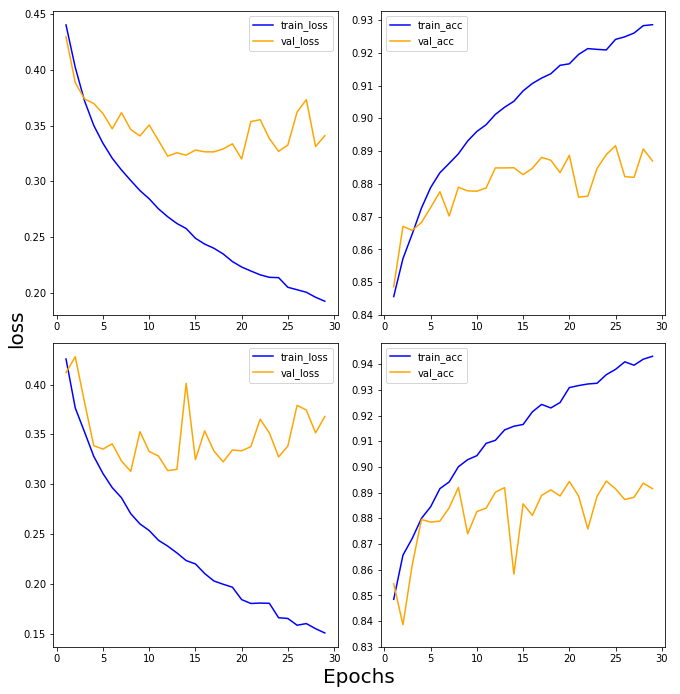

In [ ]:
def draw_loss_acc(history_1,history_2,epochs):
  his_dict_1 = history_1.history
  his_dict_2 = history_2.history
  keys = list(his_dict_1.keys())

  epochs = range(1, epochs)
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1,1,1)
  # axis 선과 ax의 축 레이블을 제거
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_color('none')
  ax.spines['left'].set_color('none')
  ax.spines['right'].set_color('none')
  ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

  for i in range(len(his_dict_1)):
    temp_ax = fig.add_subplot(2,2,i+1)
    temp = keys[i%2]
    val_temp = keys[(i+2)%2 + 2]
    temp_history = his_dict_1 if i < 2 else his_dict_2
    temp_ax.plot(epochs, temp_history[temp][1:],
                 color = 'blue', label = 'train_' + temp)
    temp_ax.plot(epochs, temp_history[val_temp][1:],
                 color = 'orange', label = val_temp)
    if(i == 1 or i == 3):
      start, end = temp_ax.get_ylim()
      temp_ax.yaxis.set_ticks(np.arange(np.round(start,2),end,0.01))
    temp_ax.legend()
  ax.set_ylabel('loss', size = 20)
  ax.set_xlabel('Epochs', size = 20)
  plt.tight_layout()
  plt.show()

draw_loss_acc(first_history, second_history, 30)